### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
!pip install quandl
import quandl
%matplotlib inline

### Read data

In [7]:
portfolio_a_path = Path("../Resources/top25_sp500_stocks.csv")
#portfolio_b_path = Path("../Resources/tech_stocks_2018_b.csv")
risk_free_rate_path= Path("../Resources/risk_free_rate.csv")

portfolio_a = pd.read_csv(portfolio_a_path, index_col='date', parse_dates=True, infer_datetime_format=True)
#portfolio_b = pd.read_csv(portfolio_b_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
risk_free_rate = pd.read_csv(risk_free_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

portfolio_a.head()

,AAPL,ABBV,AMZN,BAC,BRK-B,CVX,GOOG,GOOGL,HD,JNJ,...,MRK,MSFT,NVDA,PEP,PFE,PG,TSLA,UNH,V,XOM
date,,,,,,,,,,,,,,,,,,,,,
2012-10-31,18.23,NaN,11.64,7.96,86.35,72.84,16.94,17.02,49.15,53.82,...,31.61,23.41,2.75,51.87,16.49,51.64,1.88,47.98,32.35,59.80
2012-11-01,18.27,NaN,11.61,8.32,87.68,73.64,17.13,17.21,49.85,54.33,...,31.83,24.21,2.88,52.02,16.28,51.65,1.95,48.79,33.54,60.08
2012-11-02,17.66,NaN,11.62,8.41,86.93,71.60,17.13,17.22,49.66,53.88,...,31.87,24.19,2.87,51.73,16.28,51.61,1.93,48.02,33.43,59.21
2012-11-05,17.90,NaN,11.72,8.32,86.86,72.14,17.01,17.09,49.95,53.79,...,31.64,24.30,2.99,51.69,16.30,51.22,2.10,47.36,32.99,59.45
2012-11-06,17.85,NaN,11.88,8.49,87.29,72.92,16.98,17.06,50.14,53.96,...,31.81,24.49,2.99,51.95,16.38,51.41,2.08,48.31,33.54,60.09


### Calculate Annualized Std Dev

In [8]:
# Calculate daily returns
portfolio_a_returns = portfolio_a.pct_change().dropna()
#portfolio_b_returns = portfolio_b.pct_change().dropna()

# Concat returns into one DataFrame
all_portfolios_returns = pd.concat([portfolio_a_returns, risk_free_rate], axis='columns', join='inner')
all_portfolios_returns.head()

,AAPL,ABBV,AMZN,BAC,BRK-B,CVX,GOOG,GOOGL,HD,JNJ,...,MSFT,NVDA,PEP,PFE,PG,TSLA,UNH,V,XOM,rf_rate
2013-01-03,-0.012433,-0.008573,0.003885,-0.005837,0.004506,-0.004214,0.000555,0.000552,-0.002938,-0.001473,...,-0.013573,0.000000,0.000382,-0.002308,-0.006376,-0.016949,-0.046685,0.000826,-0.001708,0.000009
2013-01-04,-0.028177,-0.012538,0.003096,0.012720,0.002457,0.005324,0.019978,0.019879,-0.001768,0.011433,...,-0.018642,0.034014,0.001528,0.004627,0.001944,-0.012931,0.001789,0.007980,0.004619,0.000008
2013-01-07,-0.005552,0.002189,0.035494,-0.001932,-0.004262,-0.006790,-0.004353,-0.004331,-0.005510,-0.002005,...,-0.001809,-0.029605,-0.000191,0.000576,-0.006792,0.000000,0.000000,0.007098,-0.011580,0.000008
2013-01-08,0.002481,-0.021844,-0.007452,-0.008712,0.003852,-0.004512,-0.002186,-0.002175,0.006134,0.000000,...,-0.005437,-0.023729,0.003052,0.001726,-0.001563,-0.017467,-0.013170,0.009488,0.006203,0.000008
2013-01-09,-0.015470,0.005806,0.000000,-0.045898,-0.005223,0.002610,0.006572,0.006540,-0.000787,0.004567,...,0.005923,-0.020833,0.004944,0.017231,0.005479,-0.004444,0.019000,0.015306,-0.003938,0.000007


In [9]:
# Calculate Sharpe Ratio
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

AAPL       0.925364
ABBV       0.705053
AMZN       1.100050
BAC        0.501653
BRK-B      0.588450
CVX        0.145157
GOOG       0.851524
GOOGL      0.847351
HD         0.946246
JNJ        0.665220
JPM        0.645396
KO         0.389825
LLY        0.769899
MA         0.993698
META       0.956702
MRK        0.598774
MSFT       1.109392
NVDA       1.274725
PEP        0.622584
PFE        0.498923
PG         0.623410
TSLA       1.243427
UNH        1.020774
V          0.954042
XOM       -0.182134
rf_rate    0.000000
dtype: float64

### Plot sharpe ratios

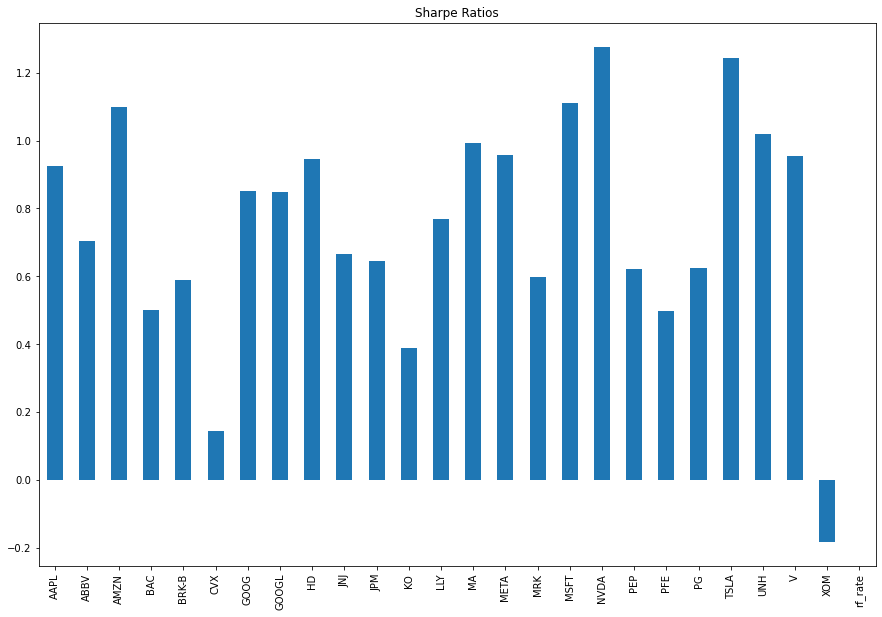

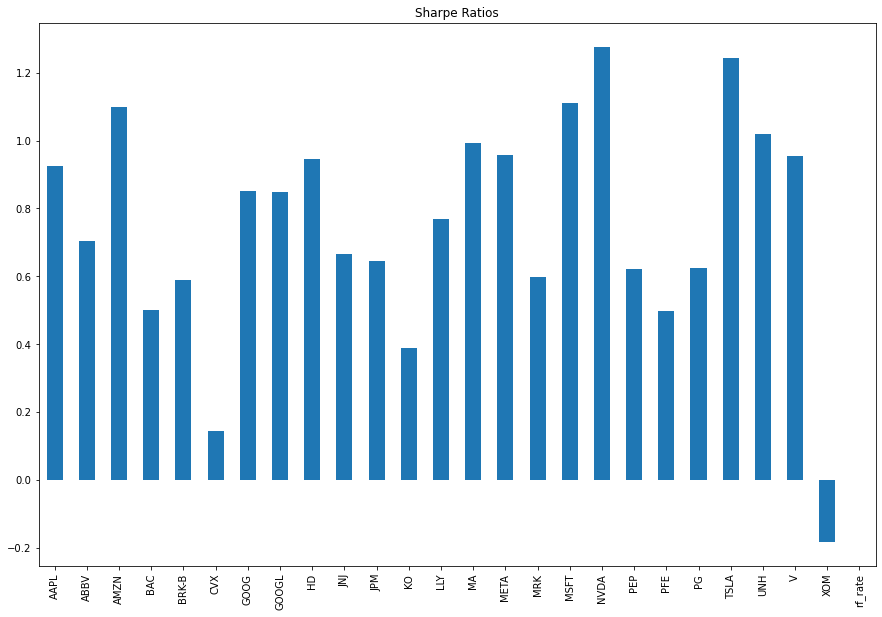

In [29]:
# Plot sharpe ratios
sharpe_plot = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(15,10)).figure

sharpe_plot

In [30]:
sharpe_plot.savefig('top_25_sharpe_ratios as png.png')